In [36]:
import json
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.rcParams['font.sans-serif'] = ['SimHei']  # 用来正常显示中文标签
plt.rcParams['axes.unicode_minus'] = False  # 用来正常显示负号


In [37]:
def show_data(path,mode):
    result=[]
    with open(path,'r',encoding='utf-8') as f:
        for line in f:
            line=json.loads(line)
            if mode=='train':
                title,company,abstract,label=line['title'],line['assignee'],line['abstract'],line['label_id']
                result.append([title,company,abstract,label])
            else:
                title,company,abstract=line['title'],line['assignee'],line['abstract']
                result.append([title,company,abstract])
    return result


In [38]:
train_data=show_data('./train.json','train')
test_data=show_data('./testA.json','test')
# 训练集 958条 测试集20839条
print(len(train_data),len(test_data))

958 20839


## label文本总共有36类

In [33]:
label_nums=len(set([i[3] for i in train_data]))
label_nums

36

In [48]:
labe_nums={}
label_list=[i[3] for i in train_data]
for i in range(36):
    labe_nums[i]=label_list.count(i)
#每一个标签对应的数量
labe_nums 

{0: 33,
 1: 19,
 2: 183,
 3: 33,
 4: 44,
 5: 36,
 6: 47,
 7: 48,
 8: 39,
 9: 25,
 10: 52,
 11: 54,
 12: 7,
 13: 16,
 14: 19,
 15: 33,
 16: 17,
 17: 13,
 18: 16,
 19: 13,
 20: 25,
 21: 12,
 22: 5,
 23: 22,
 24: 29,
 25: 16,
 26: 17,
 27: 22,
 28: 8,
 29: 7,
 30: 13,
 31: 4,
 32: 5,
 33: 8,
 34: 12,
 35: 6}

## 由上可知，样本不平衡，标签为2的有183，最少的类只有4个

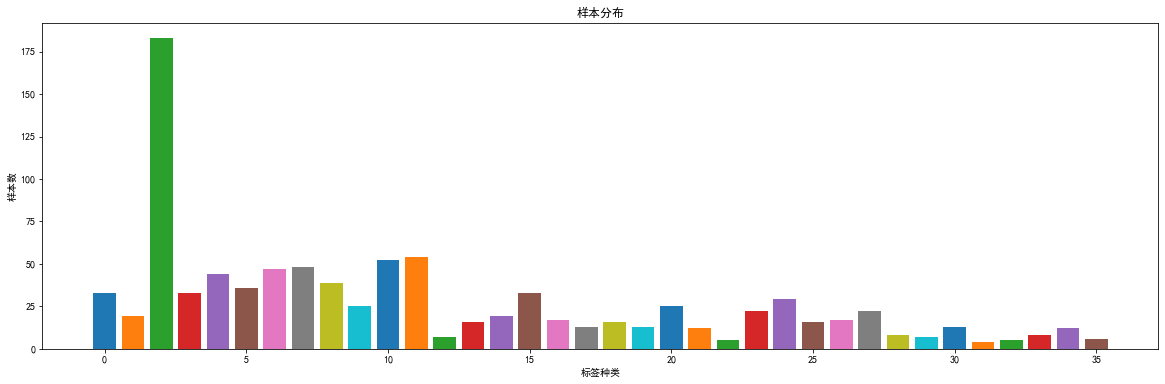

In [47]:
y=list(labe_nums.values())
plt.figure(figsize=(20,6))
for i in range(36):
    plt.bar(i,y[i])
plt.title("样本分布")
plt.xlabel("标签种类")
plt.ylabel("样本数")
plt.show()